In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report as crp
from sklearn.metrics import confusion_matrix

In [188]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [28]:
df = pd.read_csv('train_strokes.csv')

In [29]:
df = df.drop('id', axis = 1)

In [30]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Smoking

In [31]:
df.loc[(df['age'] <= 9, ['smoking_status'])] = df.loc[(df['age'] <= 9, ['smoking_status'])].fillna('never smoked')
df.loc[(df['age'] > 9 , ['smoking_status'])] = df.loc[(df['age'] > 9, ['smoking_status'])].fillna('unknown')

In [32]:
df = pd.get_dummies(df)

# Splitting Data

In [33]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

# Imputing BMI

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             43400 non-null  float64
 1   hypertension                    43400 non-null  int64  
 2   heart_disease                   43400 non-null  int64  
 3   avg_glucose_level               43400 non-null  float64
 4   bmi                             41938 non-null  float64
 5   stroke                          43400 non-null  int64  
 6   gender_Female                   43400 non-null  uint8  
 7   gender_Male                     43400 non-null  uint8  
 8   gender_Other                    43400 non-null  uint8  
 9   ever_married_No                 43400 non-null  uint8  
 10  ever_married_Yes                43400 non-null  uint8  
 11  work_type_Govt_job              43400 non-null  uint8  
 12  work_type_Never_worked          

In [36]:
imputer = IterativeImputer()

In [37]:
names = X.columns

In [38]:
X_imp = imputer.fit_transform(X)

In [39]:
X_imp = pd.DataFrame(X_imp, columns = names)

In [40]:
X_imp

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,3.0,0.0,0.0,95.12,18.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,58.0,1.0,0.0,87.96,39.2,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8.0,0.0,0.0,110.89,17.6,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,70.0,0.0,0.0,69.04,35.9,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,14.0,0.0,0.0,161.28,19.1,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0.0,0.0,58.64,20.4,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
43396,56.0,0.0,0.0,213.61,55.4,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
43397,82.0,1.0,0.0,91.94,28.9,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
43398,40.0,0.0,0.0,99.16,33.2,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, random_state = 1, test_size = 0.3)

In [43]:
def report(predictions, actuals = y_test):
    return print(crp(actuals, predictions),
                 confusion_matrix(actuals, predictions))

# Models

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rfc = RandomForestClassifier()

In [206]:
rfc?

In [207]:
rfc = RandomForestClassifier(criterion = 'entropy')

In [203]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [204]:
preds_rfc = rfc.predict(X_test)

In [205]:
report(preds_rfc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020
 [[12790     1]
 [  229     0]]


## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rfr = RandomForestRegressor()

In [51]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
preds_rfr2 = rfr.predict(X_test)

In [54]:
preds_rfr = (preds_rfr2 > 0.01).astype(int)

In [55]:
report(preds_rfr)

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     12791
           1       0.05      0.72      0.09       229

    accuracy                           0.74     13020
   macro avg       0.52      0.73      0.47     13020
weighted avg       0.98      0.74      0.84     13020
 [[9497 3294]
 [  65  164]]


In [56]:
y_test

23906    0
121      0
18540    0
13322    0
22923    0
        ..
5983     0
39388    0
40925    0
43107    0
11035    0
Name: stroke, Length: 13020, dtype: int64

## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier()

In [59]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
preds_dtc = dtc.predict(X_test)

In [61]:
report(preds_dtc)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12791
           1       0.09      0.13      0.11       229

    accuracy                           0.96     13020
   macro avg       0.54      0.55      0.54     13020
weighted avg       0.97      0.96      0.97     13020
 [[12499   292]
 [  199    30]]


## Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtr = DecisionTreeRegressor()

In [64]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
preds_dtr = dtr.predict(X_test)

In [66]:
np.unique(preds_dtr)

array([0., 1.])

In [67]:
report(preds_dtr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12791
           1       0.08      0.12      0.10       229

    accuracy                           0.96     13020
   macro avg       0.53      0.55      0.54     13020
weighted avg       0.97      0.96      0.97     13020
 [[12499   292]
 [  202    27]]


## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lreg = LogisticRegression(max_iter = 1000)

In [70]:
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
preds_lreg = lreg.predict(X_test)

In [72]:
report(preds_lreg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020
 [[12791     0]
 [  229     0]]


/Users/nikolausfischer-zernin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolausfischer-zernin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nikolausfischer-zernin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## XGBoost Classifier

In [73]:
from xgboost import XGBClassifier

In [74]:
xgbc = XGBClassifier()

In [75]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
preds_xgbc = xgbc.predict(X_test)

In [77]:
report(preds_xgbc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12791
           1       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020
 [[12782     9]
 [  229     0]]


# Hyperparameter Tuning

Da der Random Forest Regressor mit eingefügtem Threshold die beste Performance bietet, werden wir nun versuchen ihn zu tunen.

In [149]:
old_predictions = []

In [92]:
from sklearn.model_selection import GridSearchCV

In [137]:
rfr?

In [138]:
for i in range(1,4):
    print(i)

1
2
3


In [210]:
params = {'n_estimators': [100, 125, 150, 176],
         'max_depth': range(1, 52, 5),
         'random_state': [1]}

In [ ]:
params = {'n_estimators': [176],
         'max_depth': range(1, 51, 3),
         'random_state': [1]}

In [211]:
forest_CV = GridSearchCV(RandomForestRegressor(), params, cv = 5, n_jobs = -1)

In [212]:
forest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 52, 5),
                         'n_estimators': [100, 125, 150, 176],
                         'random_state': [1]})

In [213]:
forest_CV.best_params_

{'max_depth': 6, 'n_estimators': 125, 'random_state': 1}

In [216]:
%notify
preds_forest2 = forest_CV.predict(X_test)

<IPython.core.display.Javascript object>

In [235]:
preds_forest = (preds_forest2 > 0.01).astype(int)

In [236]:
report(preds_forest)

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     12791
           1       0.04      0.86      0.08       229

    accuracy                           0.64     13020
   macro avg       0.52      0.75      0.43     13020
weighted avg       0.98      0.64      0.76     13020
 [[8137 4654]
 [  32  197]]


# Anderes

In [79]:
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,
                       class_names=['0','1'],
                       feature_names = X.columns,
                       proportion=True,precision=2)

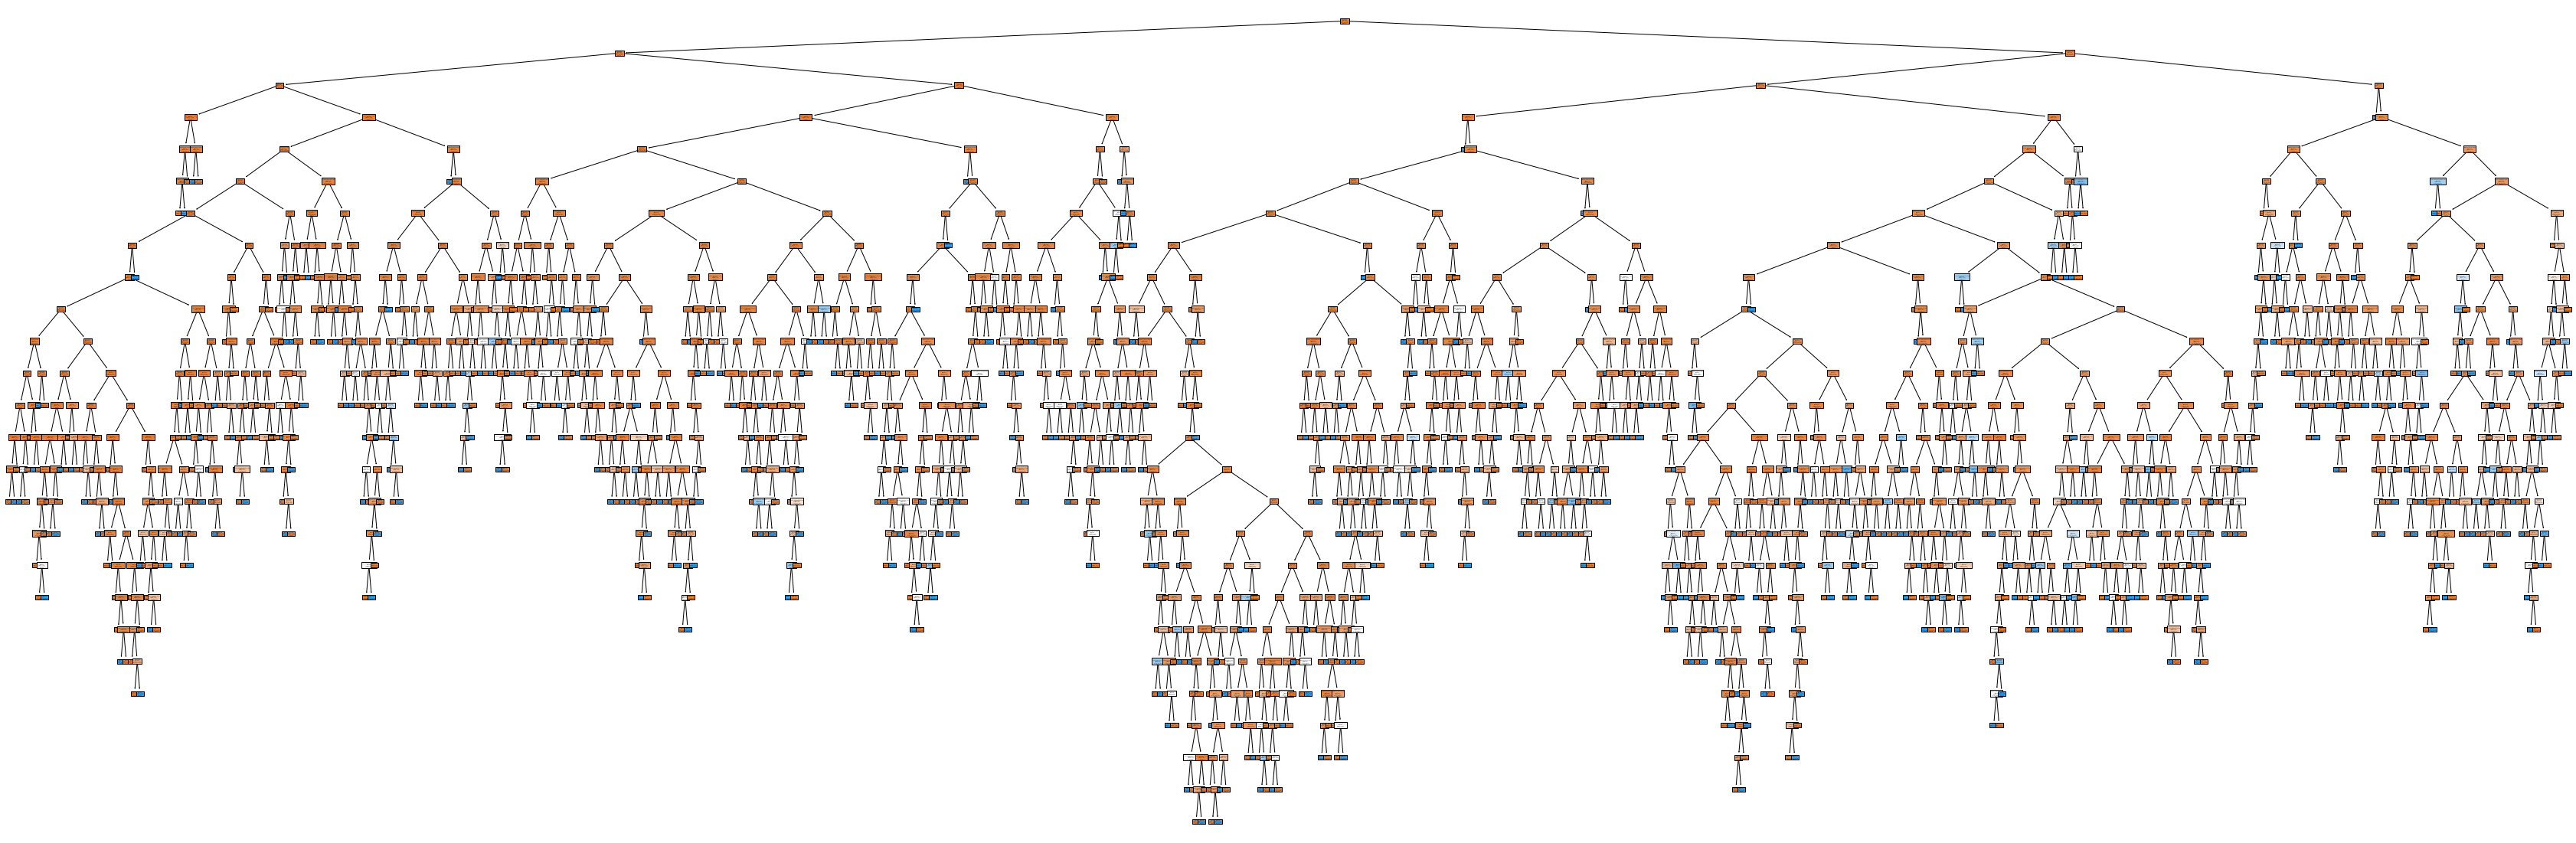

In [83]:
plot_tree_classification(dtc, X_train)

In [84]:
def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300) 
    ax.barh(imp["names"],imp["imp"], color="green") 
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable Importance Plot\n') 
    plt.show() 

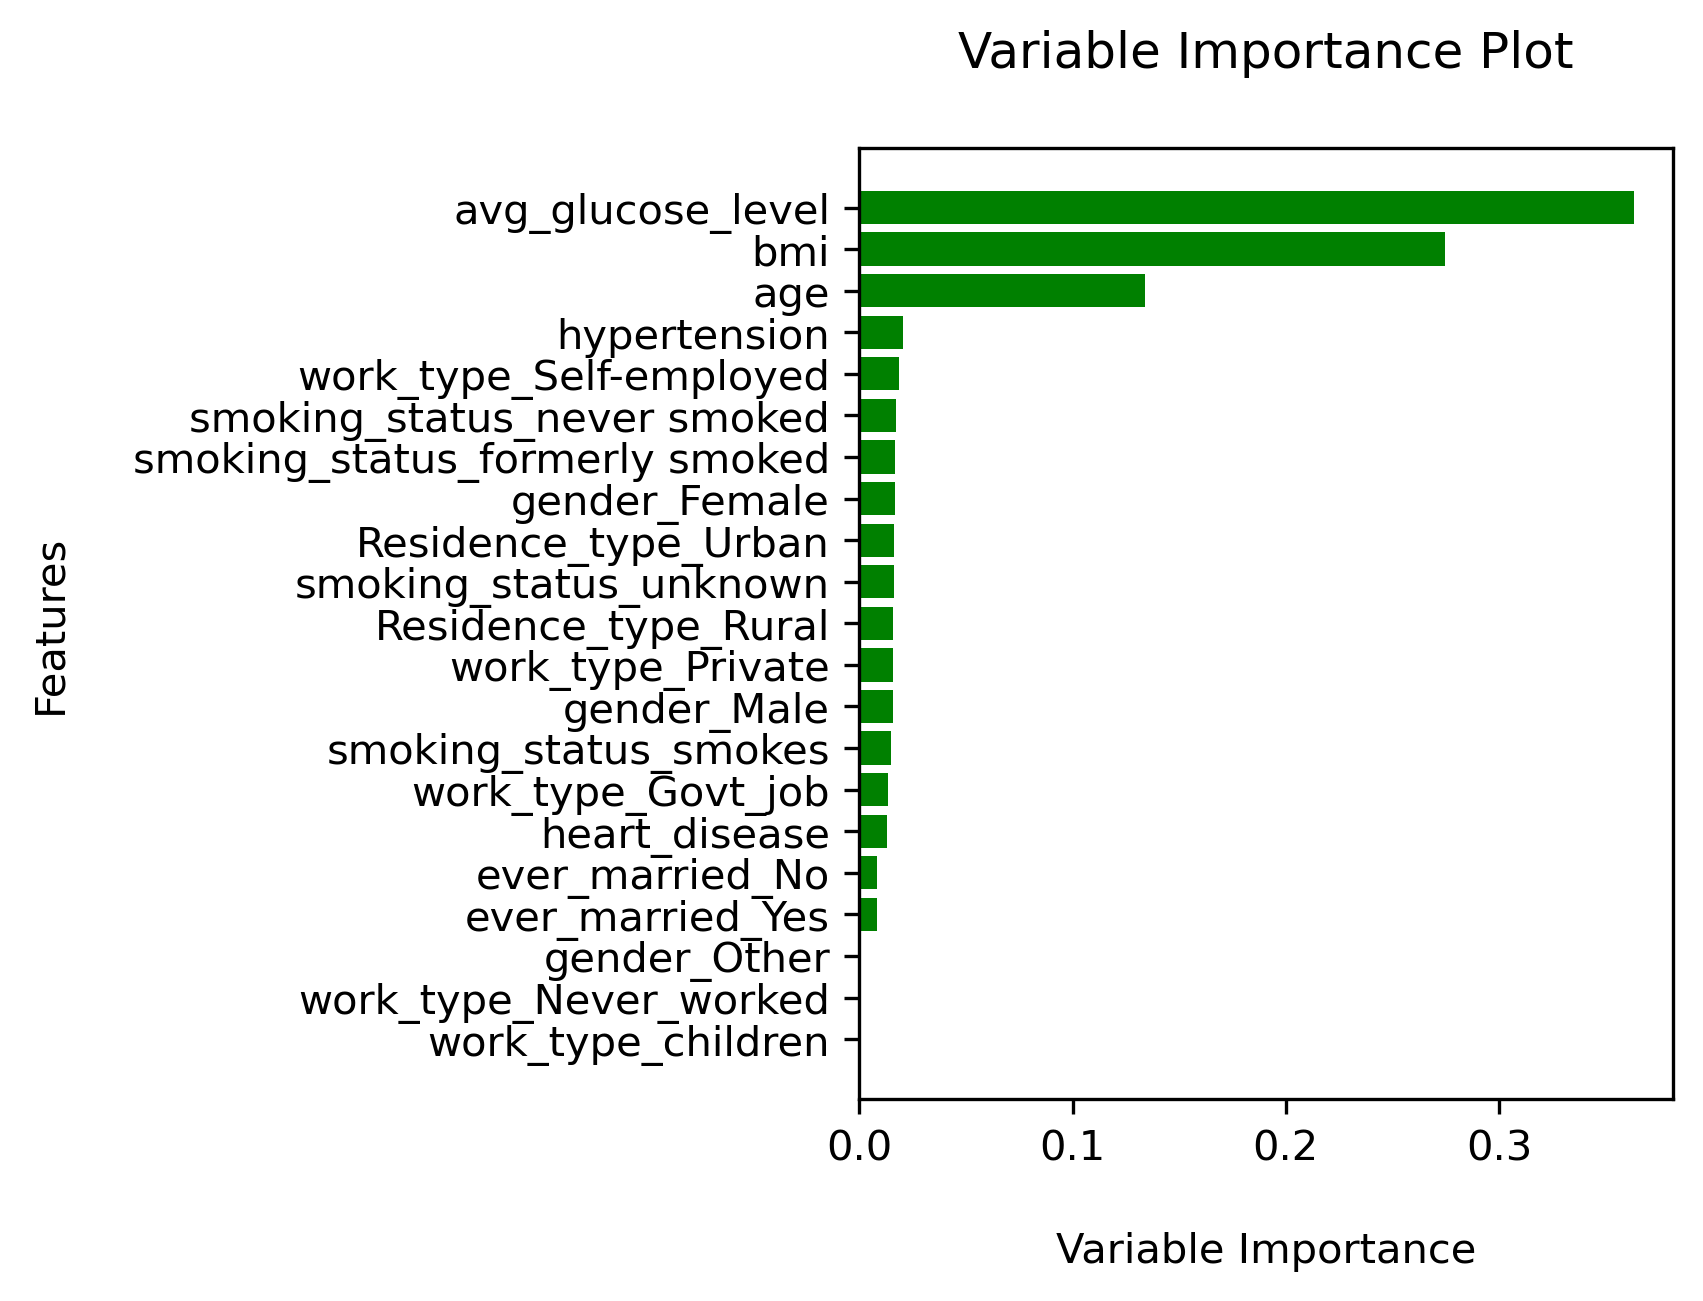

In [85]:
plot_variable_importance(rfr, X_train)

In [88]:
rfr.decision_path(X_train)

(<30380x134720 sparse matrix of type '<class 'numpy.int64'>'
 	with 31052461 stored elements in Compressed Sparse Row format>,
 array([     0,   1453,   2844,   4193,   5584,   6885,   8222,   9555,
         10954,  12349,  13720,  15069,  16412,  17727,  19108,  20443,
         21766,  23139,  24502,  25885,  27236,  28677,  30006,  31343,
         32668,  34051,  35410,  36793,  38188,  39505,  40898,  42271,
         43628,  44947,  46356,  47717,  49056,  50349,  51626,  52995,
         54350,  55731,  57068,  58399,  59748,  61025,  62450,  63793,
         65126,  66421,  67740,  69155,  70488,  71795,  73096,  74383,
         75612,  77025,  78306,  79641,  80932,  82295,  83740,  85083,
         86370,  87697,  89116,  90445,  91846,  93141,  94528,  95891,
         97170,  98487,  99786, 101115, 102458, 103759, 105158, 106561,
        107838, 109209, 110596, 112007, 113360, 114637, 115948, 117319,
        118694, 119981, 121268, 122619, 123956, 125299, 126646, 127975,
        1

In [91]:
rfr.get_params(deep = True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}